## Решение задачи Коши

### Постановка задачи:
Дана система из двух уравнений следующего вида:
#### x' = f0(t, x, y)<br /> y' = f1(t, x, y)
где **f0** и **f1** - известные функции. Также известны краевые условия, **x(0) = x0** и **y(0) = y0**. Требуется найти **x** и **y**. Также будем считать решения для интервала **t = [0, T]**.

#### Для её решения воспользуемся методом Рунге-Кутты четвёртого порядка.
Возьмем формулы, приведенные, например, на википедии и запрограммируем решение для обоих уравнений:
<img src="images/cauchy_sol.png">
Аргументом **x** в приведенных выше формулах, в нашем случае будет являться **t**.

#### Эти действия реализованы в модуле model/cauchy_solver.py

In [1]:
import numpy as np
import model.cauchy_solver as cs

### Возьмем какую-нибудь систему, для которой заранее будем знать аналитическое решение и протестируем на ней наш метод:

Например:<br/>
**x' = 2x - 5y + 3<br/>
y' = 5x - 6y + 1**<br/>
С начальными условиями **x(0) = 6, y(0) = 5**

Аналитическими решениями для этой системы являются следующие функции:
<img src="images/system_sol.png" width='30%'>

In [6]:
def f0(t, x, y):
    return 2 * x - 5 * y + 3

def f1(t, x, y):
    return 5 * x - 6 * y + 1


# analytical solution
def x_correct(t):
    return 5 * np.exp(-2 * t) * np.cos(3 * t) + 1

def y_correct(t):
    return np.exp(-2 * t) * (4 * np.cos(3 * t) + 3 * np.sin(3 * t)) + 1

In [7]:
t = np.linspace(0., 5., num=10000)
x0, y0 = 6, 5
x, y = cs.solve(f0, f1, t, x0, y0) # solve using our method

### Изобразим фазовый портрет

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

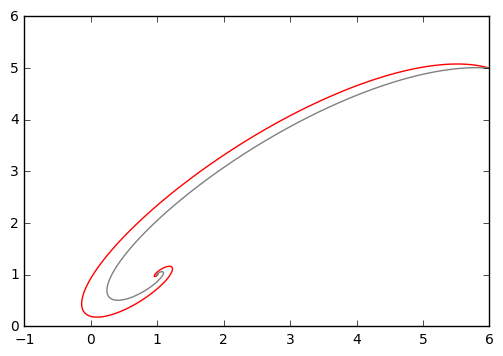

In [10]:
plt.plot(x, y,'r')
plt.plot([x_correct(_t) for _t in t], [y_correct(_t) for _t in t], 'grey')
plt.show()